In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.api as sm

In [2]:
#load/menampilkan dataset
file_path = 'ADANIPORTS.csv'
data = pd.read_csv(file_path)

In [3]:
#menampilkan nama kolom
print(data.columns)

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')


In [4]:
#menampilkan informasi umum dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3322 non-null   object 
 1   Symbol              3322 non-null   object 
 2   Series              3322 non-null   object 
 3   Prev Close          3322 non-null   float64
 4   Open                3322 non-null   float64
 5   High                3322 non-null   float64
 6   Low                 3322 non-null   float64
 7   Last                3322 non-null   float64
 8   Close               3322 non-null   float64
 9   VWAP                3322 non-null   float64
 10  Volume              3322 non-null   int64  
 11  Turnover            3322 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  3322 non-null   int64  
 14  %Deliverble         3322 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 389.4

In [5]:
print (data.describe())

        Prev Close         Open         High          Low         Last  \
count  3322.000000  3322.000000  3322.000000  3322.000000  3322.000000   
mean    344.114314   344.763019   351.608007   337.531969   344.239539   
std     192.936882   193.619992   198.617808   188.676614   193.187813   
min     108.000000   108.000000   110.450000   105.650000   108.000000   
25%     164.312500   164.850000   168.000000   161.600000   164.075000   
50%     324.700000   325.750000   331.275000   319.850000   325.000000   
75%     400.912500   401.000000   407.187500   395.000000   400.912500   
max    1307.450000  1310.250000  1324.000000  1270.000000  1308.000000   

             Close         VWAP        Volume      Turnover        Trades  \
count  3322.000000  3322.000000  3.322000e+03  3.322000e+03  2.456000e+03   
mean    344.201626   344.853182  2.954564e+06  1.070144e+14  4.492259e+04   
std     193.045886   193.841305  4.104227e+06  2.625564e+14  5.023124e+04   
min     108.000000   108.


Matriks Korelasi:
                    Prev Close      Open      High       Low      Last  \
Prev Close            1.000000  0.997228  0.995592  0.996221  0.995130   
Open                  0.997228  1.000000  0.998697  0.998741  0.997855   
High                  0.995592  0.998697  1.000000  0.997991  0.999045   
Low                   0.996221  0.998741  0.997991  1.000000  0.998788   
Last                  0.995130  0.997855  0.999045  0.998788  1.000000   
Close                 0.995193  0.997934  0.999058  0.998904  0.999961   
VWAP                  0.995842  0.998748  0.999504  0.999184  0.999605   
Volume                0.055715  0.060509  0.068102  0.058525  0.066266   
Turnover              0.218236  0.225149  0.233603  0.223279  0.231077   
Trades                0.564067  0.566414  0.581243  0.555585  0.569473   
Deliverable Volume   -0.139582 -0.135827 -0.131160 -0.136498 -0.131522   
%Deliverble          -0.248207 -0.249195 -0.254316 -0.249176 -0.253037   

                  

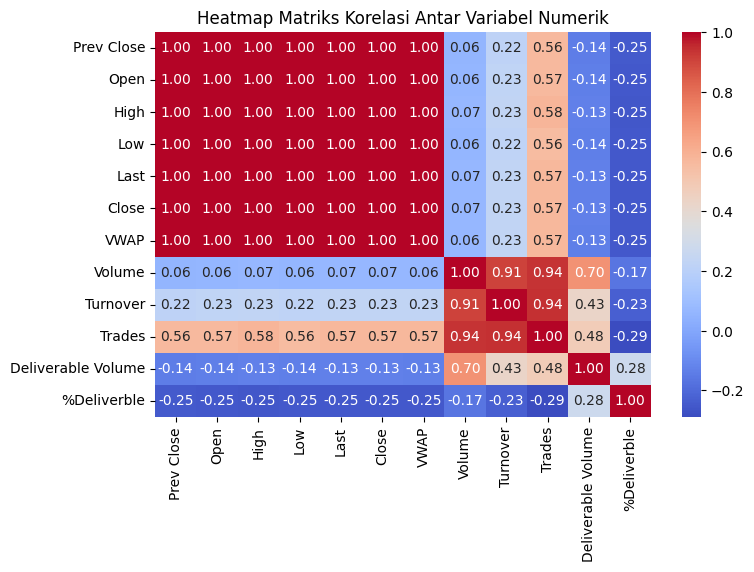

In [6]:

kolom_numerik = data.select_dtypes(include=np.number).columns.tolist()

# Hitung matriks korelasi
matriks_korelasi = data[kolom_numerik].corr()

# Tampilkan matriks korelasi
print("\nMatriks Korelasi:")
print(matriks_korelasi)

# Visualisasikan matriks korelasi menggunakan heatmap
plt.figure(figsize=(8, 5 ))
sns.heatmap(matriks_korelasi, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Matriks Korelasi Antar Variabel Numerik')
plt.show()

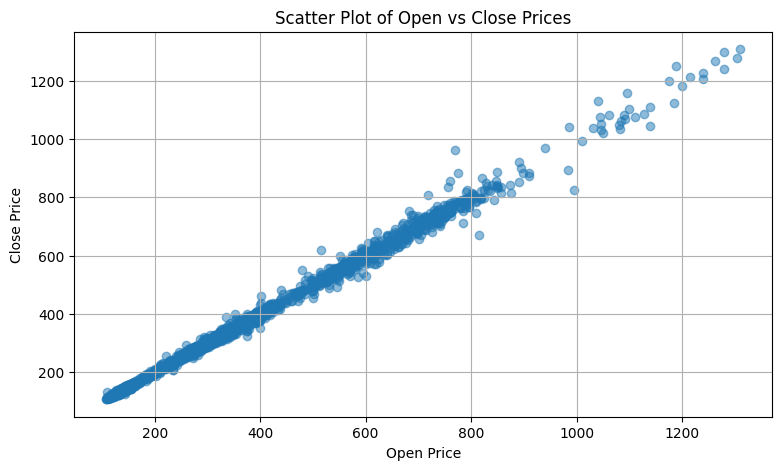

In [7]:

fig = px.scatter(data, x='Open', y='Close', title='Scatter Plot of Open vs Close Prices')
fig.show()

# Membuat scatter plot menggunakan Matplotlib
plt.figure(figsize=(9, 5))
plt.scatter(data['Open'], data['Close'], alpha=0.5)
plt.title('Scatter Plot of Open vs Close Prices')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

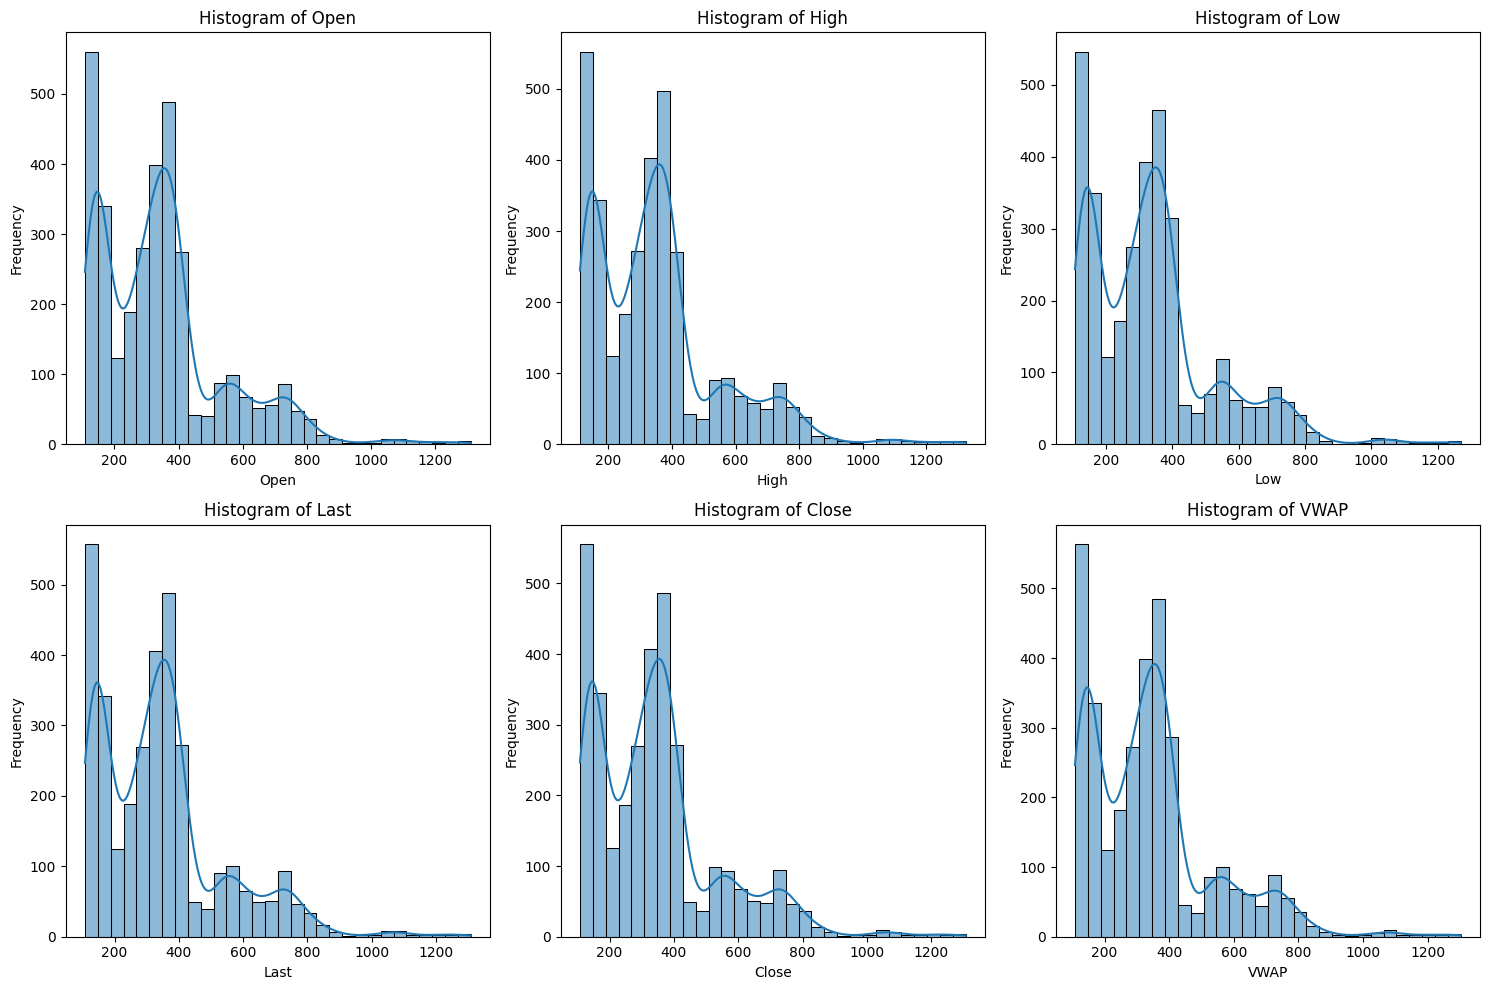

In [8]:


import matplotlib.pyplot as plt
# List of columns to plot histograms for
columns_to_plot = ['Open', 'High', 'Low', 'Last', 'Close', 'VWAP']

# Create histograms for the specified columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_plot):
    plt.subplot(2, 3, i + 1)  # Create a 2x3 grid of subplots
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust layout to prevent overlapping titles/labels
plt.show()


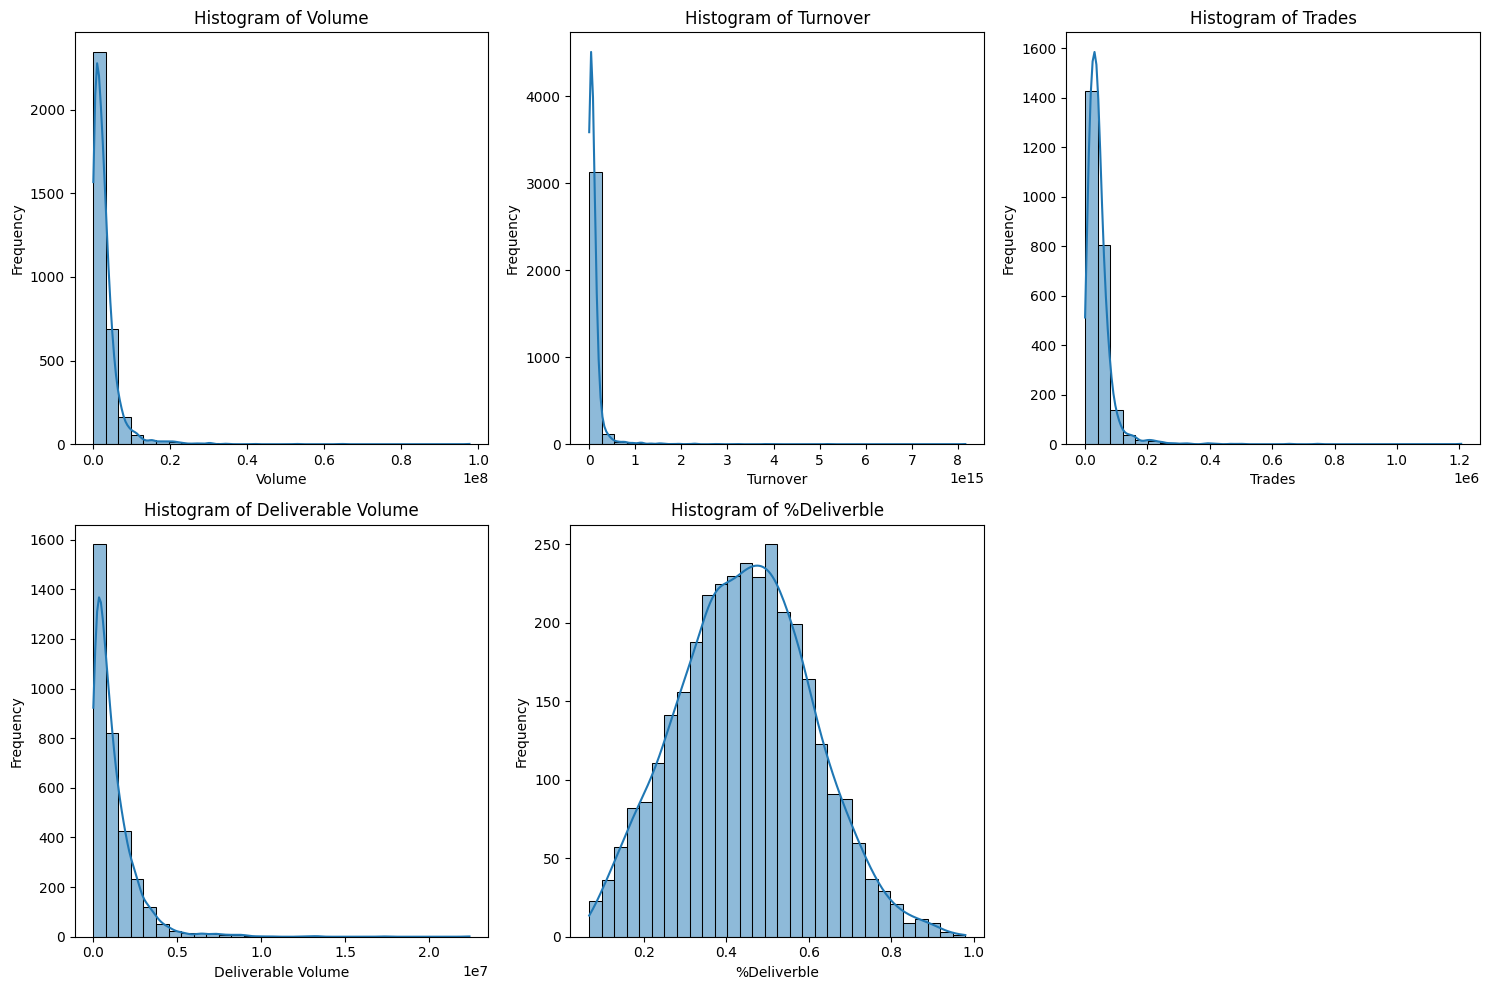

In [9]:


import matplotlib.pyplot as plt
# List of columns to plot histograms for
columns_to_plot_volume = ['Volume', 'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble']

# Create histograms for the specified columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_plot_volume):
    plt.subplot(2, 3, i + 1)  # Create a 2x3 grid of subplots
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust layout to prevent overlapping titles/labels
plt.show()


In [10]:


# Check for missing values
print("\nMissing values before handling:")
print(data.isnull().sum())

for col in kolom_numerik:
    if data[col].isnull().any():
        mean_value = data[col].mean()
        data[col].fillna(mean_value, inplace=True)
        print(f"Filled missing values in '{col}' with the mean ({mean_value:.2f})")


# Check for missing values after handling
print("\nMissing values after handling:")
print(data.isnull().sum())


Missing values before handling:
Date                    0
Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                866
Deliverable Volume      0
%Deliverble             0
dtype: int64
Filled missing values in 'Trades' with the mean (44922.59)

Missing values after handling:
Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64


/tmp/ipython-input-10-1539811454.py:8: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [11]:
# Pilih fitur dan target
features = ['Open', 'High', 'Low', 'VWAP', 'Volume', 'Turnover']
target = 'Close'

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

In [13]:
# prompt: pilihkan fitur x ( variabel independen ) dan target y ( variabel dependen )

X = data[features]
y = data[target]

print("\nFeatures (X) selected:")
print(X.head())

print("\nTarget (y) selected:")
print(y.head())



Features (X) selected:
     Open     High    Low    VWAP    Volume      Turnover
0  770.00  1050.00  770.0  984.72  27294366  2.687719e+15
1  984.00   990.00  874.0  941.38   4581338  4.312765e+14
2  909.00   914.75  841.0  888.09   5124121  4.550658e+14
3  890.00   958.00  890.0  929.17   4609762  4.283257e+14
4  939.75   995.00  922.0  965.65   2977470  2.875200e+14

Target (y) selected:
0    962.90
1    893.90
2    884.20
3    921.55
4    969.30
Name: Close, dtype: float64


In [14]:
from sklearn.preprocessing import MinMaxScaler

# Inisialisasi scaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Scaling fitur dan target
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))


In [15]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.20, random_state=42)




In [16]:
model = LinearRegression()


In [17]:
model.fit(X_train, y_train)

LinearRegression()

In [22]:
# Prediksi pada data uji
y_pred = model.predict(X_test)

In [23]:
# Kembalikan hasil ke skala asli
y_pred_original = scaler_y.inverse_transform(y_pred.reshape(-1, 1))
y_test_original = scaler_y.inverse_transform(y_test)


In [24]:
# Evaluasi performa model
print("MAE:", mean_absolute_error(y_test_original, y_pred_original))
print("MSE:", mean_squared_error(y_test_original, y_pred_original))
print("R2 Score:", r2_score(y_test_original, y_pred_original))

MAE: 2.5279183508056873
MSE: 21.65323474663368
R2 Score: 0.9994487382145686


In [25]:
# Bandingkan satu nilai
print("\nContoh:")
print("Prediksi ke-1:", y_pred_original[1][0])
print("Nilai Asli ke-1:", y_test_original[1][0])


Contoh:
Prediksi ke-1: 133.06465013046954
Nilai Asli ke-1: 133.25


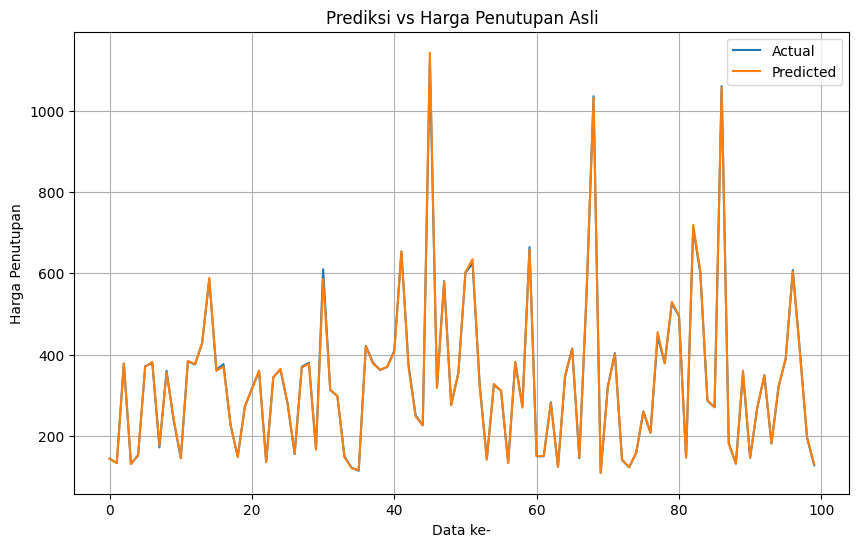

In [26]:
# Visualisasi hasil prediksi vs nilai asli
plt.figure(figsize=(10,6))
plt.plot(y_test_original[:100], label='Actual')
plt.plot(y_pred_original[:100], label='Predicted')
plt.title('Prediksi vs Harga Penutupan Asli')
plt.xlabel('Data ke-')
plt.ylabel('Harga Penutupan')
plt.legend()
plt.grid(True)
plt.show()